In [60]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


**Fetch the Data**


In [61]:
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**Data Cleaning and Understanding**

In [62]:
for ticker in tickers:
    df = data[ticker]
    print(f"Data for {ticker}:")
    print(df.describe(), "\n")


Data for TSLA:
Price     Adj Close        Close         High          Low         Open  \
Ticker         TSLA         TSLA         TSLA         TSLA         TSLA   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean     111.438965   111.438965   113.895836   108.869421   111.461872   
std      110.120450   110.120450   112.643277   107.541830   110.208156   
min        9.578000     9.578000    10.331333     9.403333     9.488000   
25%       17.066167    17.066167    17.368167    16.790167    17.058499   
50%       25.043000    25.043000    25.279000    24.462334    24.986667   
75%      216.865002   216.865002   221.910004   212.084999   217.264999   
max      409.970001   409.970001   414.496674   405.666656   411.470001   

Price         Volume  
Ticker          TSLA  
count   2.474000e+03  
mean    1.125745e+08  
std     7.449619e+07  
min     1.062000e+07  
25%     6.682590e+07  
50%     9.289395e+07  
75%     1.301899e+08  
max     9.140820e+08   

Da

In [63]:
for ticker in tickers:
    df = data[ticker]
    print(df.isnull().sum(), "\n")


Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64 

Price      Ticker
Adj Close  BND       0
Close      BND       0
High       BND       0
Low        BND       0
Open       BND       0
Volume     BND       0
dtype: int64 

Price      Ticker
Adj Close  SPY       0
Close      SPY       0
High       SPY       0
Low        SPY       0
Open       SPY       0
Volume     SPY       0
dtype: int64 



In [64]:
for ticker in tickers:
    df = data[ticker]
    print(df.dtypes, "\n")


Price      Ticker
Adj Close  TSLA      float64
Close      TSLA      float64
High       TSLA      float64
Low        TSLA      float64
Open       TSLA      float64
Volume     TSLA        int64
dtype: object 

Price      Ticker
Adj Close  BND       float64
Close      BND       float64
High       BND       float64
Low        BND       float64
Open       BND       float64
Volume     BND         int64
dtype: object 

Price      Ticker
Adj Close  SPY       float64
Close      SPY       float64
High       SPY       float64
Low        SPY       float64
Open       SPY       float64
Volume     SPY         int64
dtype: object 



In [65]:
for ticker in tickers:
    df = data[ticker]
    df_normalized = (df - df.min()) / (df.max() - df.min())


**Conduct Exploratory Data Analysis: Visualize the Closing Price Over Time**



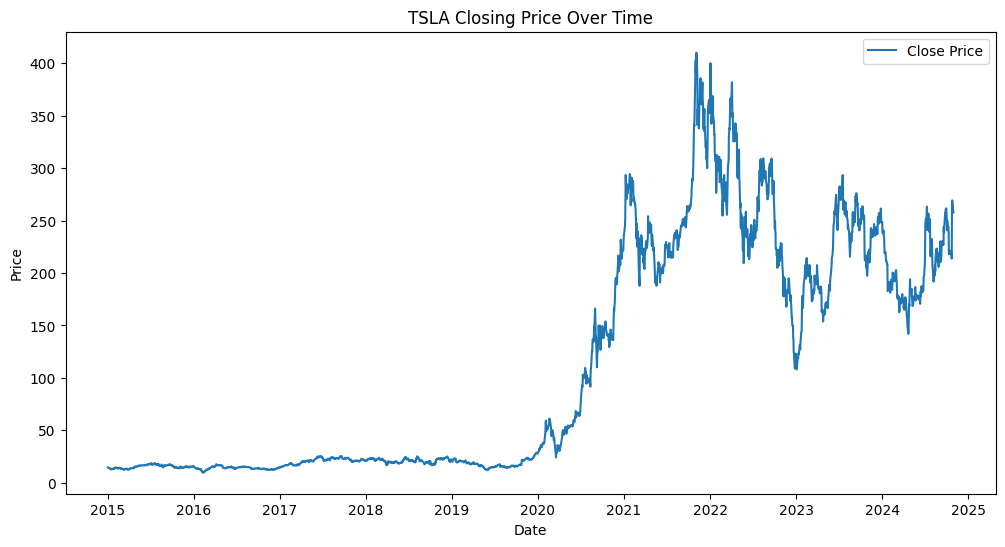

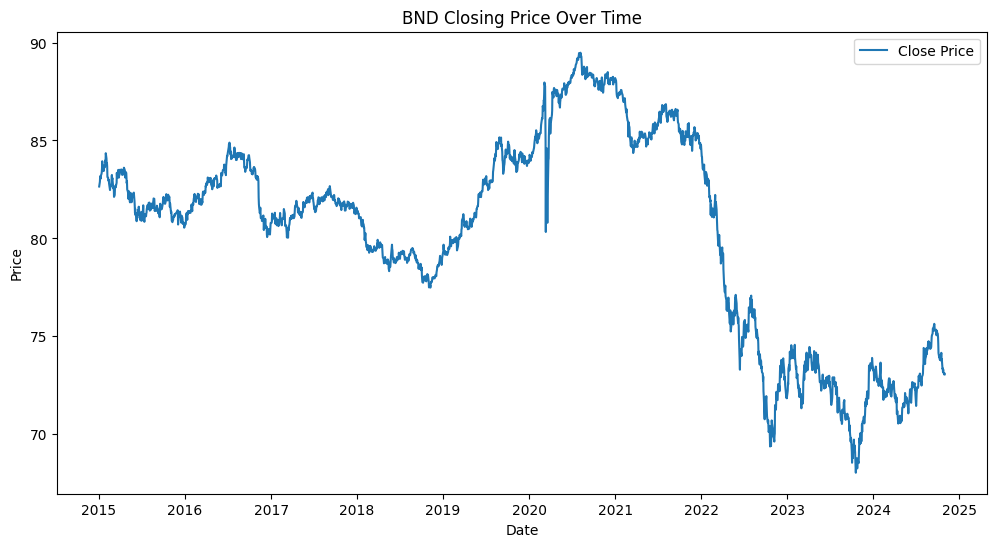

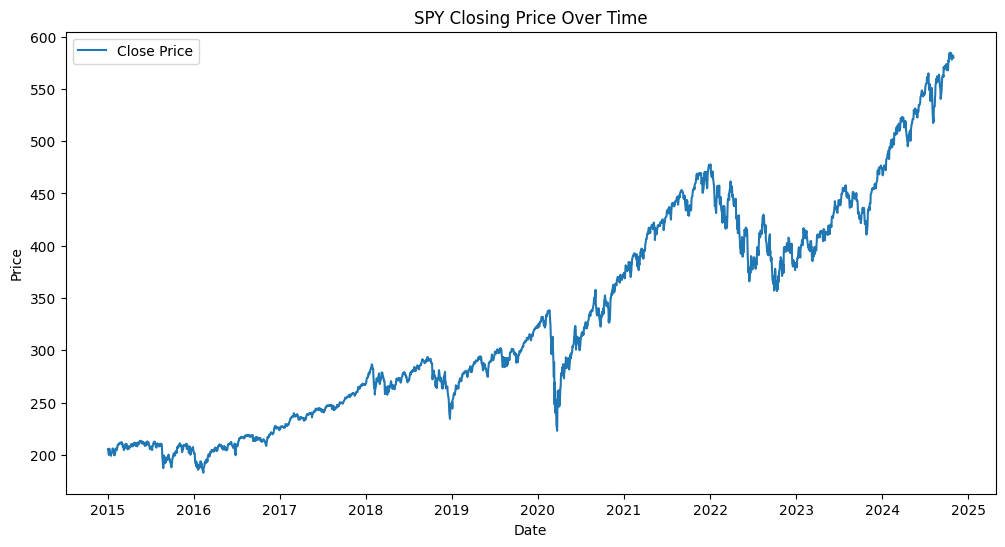

In [66]:
for ticker in tickers:
    df = data[ticker]
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Close Price')
    plt.title(f'{ticker} Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


**Calculate and Plot the Daily Percentage Change:**

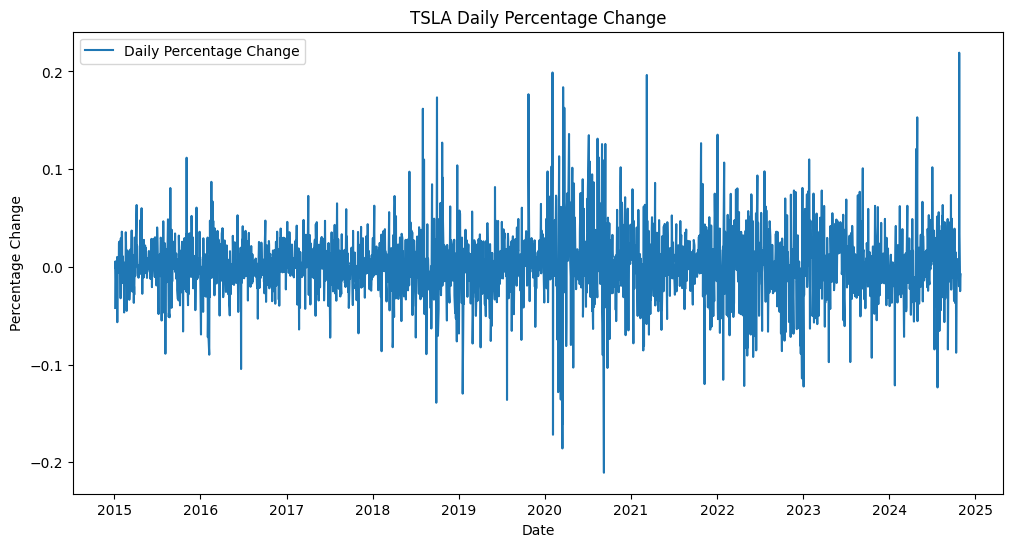

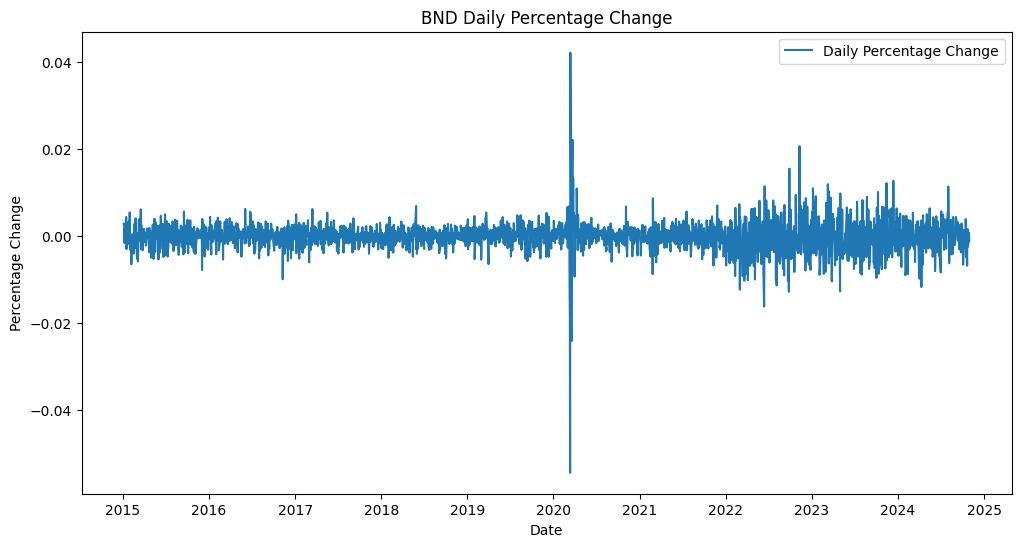

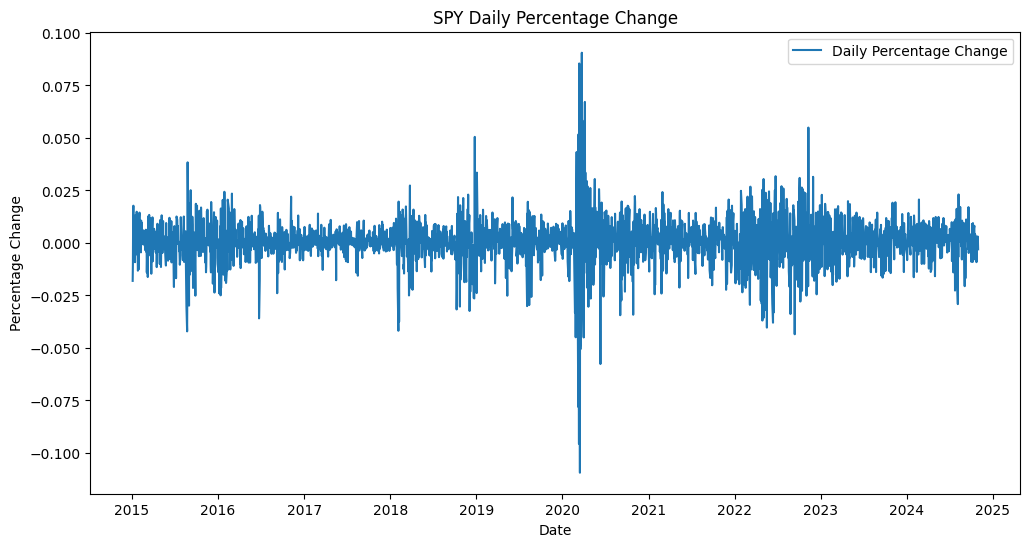

In [67]:
for ticker in tickers:
    df = data[ticker]
    daily_pct_change = df['Close'].pct_change()
    plt.figure(figsize=(12, 6))
    plt.plot(daily_pct_change, label='Daily Percentage Change')
    plt.title(f'{ticker} Daily Percentage Change')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.legend()
    plt.show()


**Analyze Volatility by Calculating Rolling Means and Standard Deviations:**

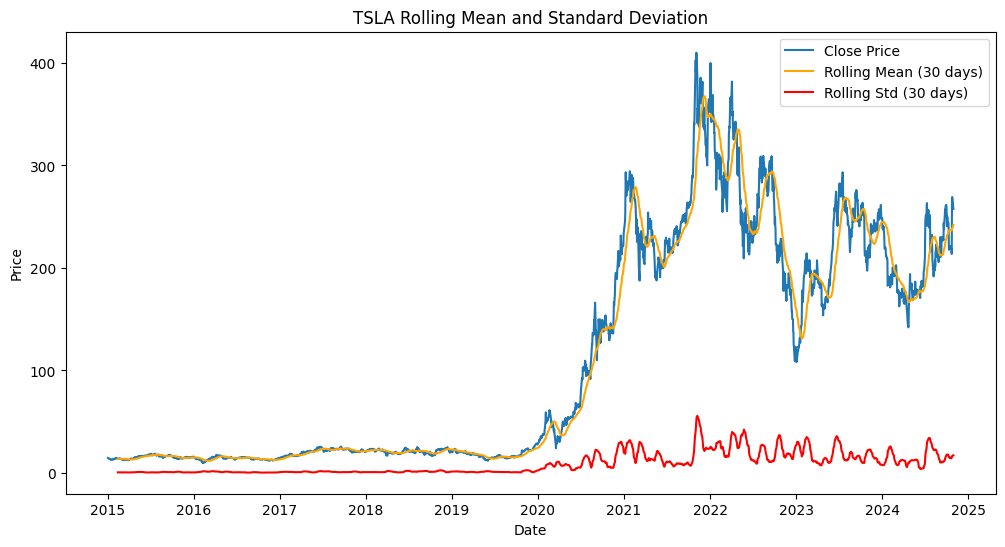

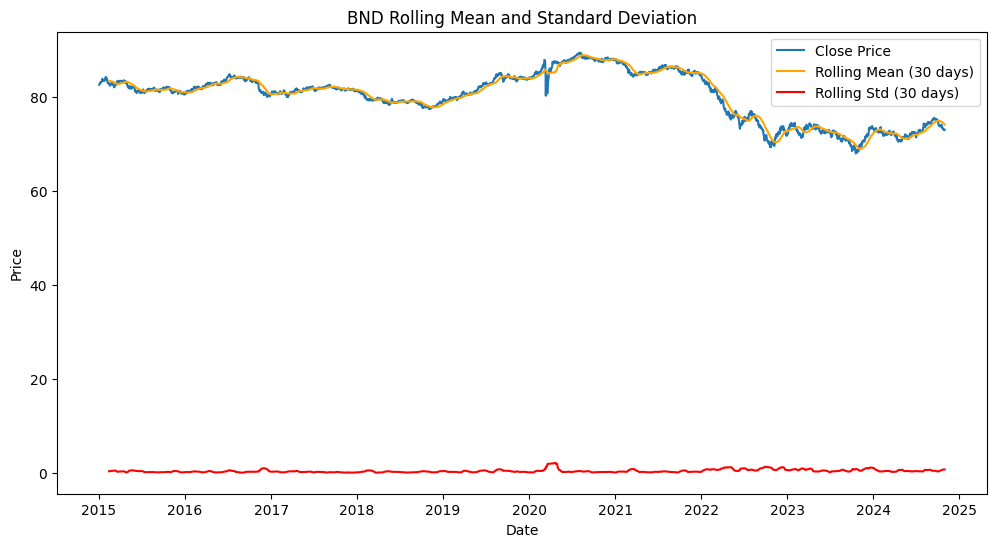

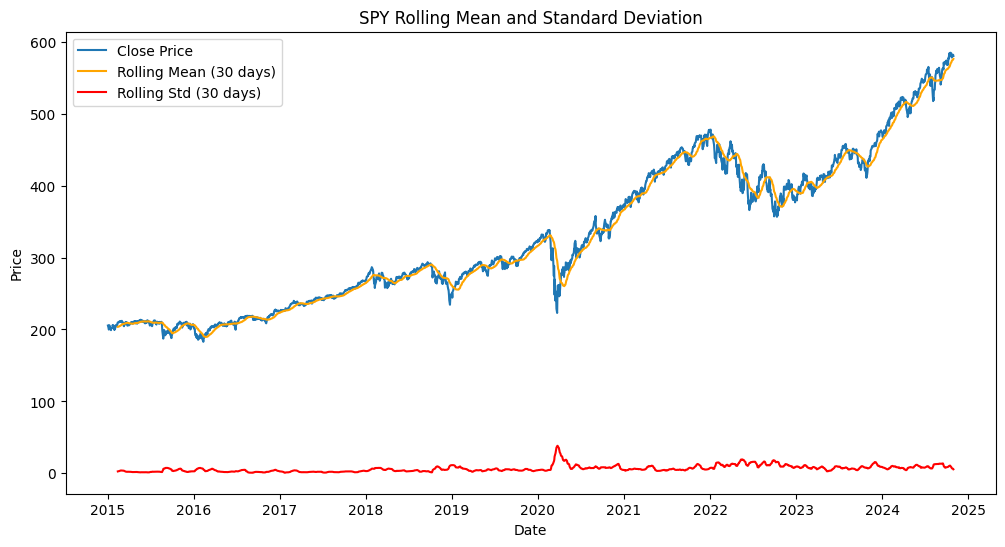

In [68]:
for ticker in tickers:
    df = data[ticker]
    rolling_mean = df['Close'].rolling(window=30).mean()
    rolling_std = df['Close'].rolling(window=30).std()
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Close Price')
    plt.plot(rolling_mean, label='Rolling Mean (30 days)', color='orange')
    plt.plot(rolling_std, label='Rolling Std (30 days)', color='red')
    plt.title(f'{ticker} Rolling Mean and Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


**Perform Outlier Detection:**

In [69]:
for ticker in tickers:
    df = data[ticker]
    daily_pct_change = df['Close'].pct_change()
    outliers = df[(np.abs(daily_pct_change) > 0.1)]
    print(f"Outliers for {ticker}:")
    print(outliers, "\n")


Outliers for TSLA:
Price                       Adj Close       Close        High         Low  \
Ticker                           TSLA        TSLA        TSLA        TSLA   
Date                                                                        
2015-01-02 00:00:00+00:00         NaN         NaN         NaN         NaN   
2015-01-05 00:00:00+00:00         NaN         NaN         NaN         NaN   
2015-01-06 00:00:00+00:00         NaN         NaN         NaN         NaN   
2015-01-07 00:00:00+00:00         NaN         NaN         NaN         NaN   
2015-01-08 00:00:00+00:00         NaN         NaN         NaN         NaN   
...                               ...         ...         ...         ...   
2024-10-24 00:00:00+00:00  260.480011  260.480011  262.119995  242.649994   
2024-10-25 00:00:00+00:00         NaN         NaN         NaN         NaN   
2024-10-28 00:00:00+00:00         NaN         NaN         NaN         NaN   
2024-10-29 00:00:00+00:00         NaN         NaN        

**Analyze Days with Unusually High or Low Returns**

In [70]:
for ticker in tickers:
    df = data[ticker]
    daily_pct_change = df['Close'].pct_change()
    high_returns = daily_pct_change[daily_pct_change > 0.05]
    low_returns = daily_pct_change[daily_pct_change < -0.05]
    print(f"Days with high returns for {ticker}:")
    print(high_returns, "\n")
    print(f"Days with low returns for {ticker}:")
    print(low_returns, "\n")


Days with high returns for TSLA:
Ticker                        TSLA
Date                              
2015-01-02 00:00:00+00:00      NaN
2015-01-05 00:00:00+00:00      NaN
2015-01-06 00:00:00+00:00      NaN
2015-01-07 00:00:00+00:00      NaN
2015-01-08 00:00:00+00:00      NaN
...                            ...
2024-10-24 00:00:00+00:00  0.21919
2024-10-25 00:00:00+00:00      NaN
2024-10-28 00:00:00+00:00      NaN
2024-10-29 00:00:00+00:00      NaN
2024-10-30 00:00:00+00:00      NaN

[2474 rows x 1 columns] 

Days with low returns for TSLA:
Ticker                     TSLA
Date                           
2015-01-02 00:00:00+00:00   NaN
2015-01-05 00:00:00+00:00   NaN
2015-01-06 00:00:00+00:00   NaN
2015-01-07 00:00:00+00:00   NaN
2015-01-08 00:00:00+00:00   NaN
...                         ...
2024-10-24 00:00:00+00:00   NaN
2024-10-25 00:00:00+00:00   NaN
2024-10-28 00:00:00+00:00   NaN
2024-10-29 00:00:00+00:00   NaN
2024-10-30 00:00:00+00:00   NaN

[2474 rows x 1 columns] 

Days with 

**Seasonality and Trends with Decomposition Time Seriouse**

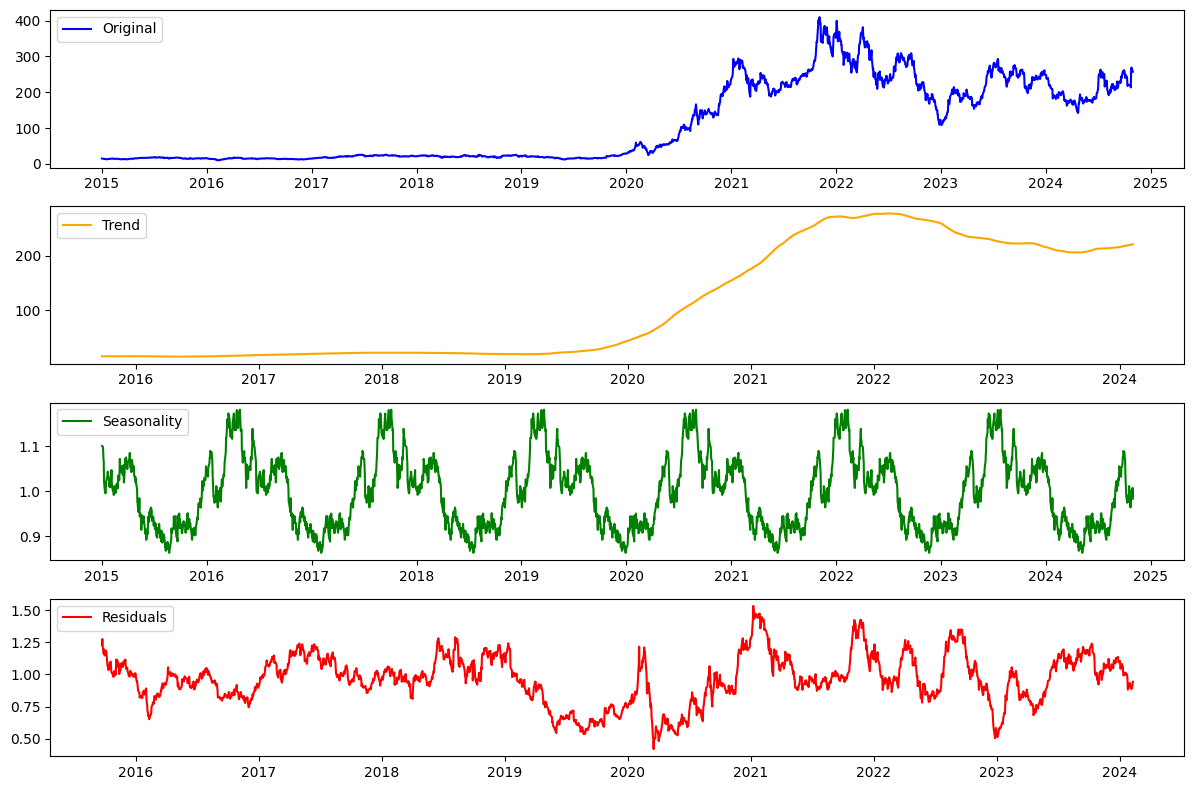

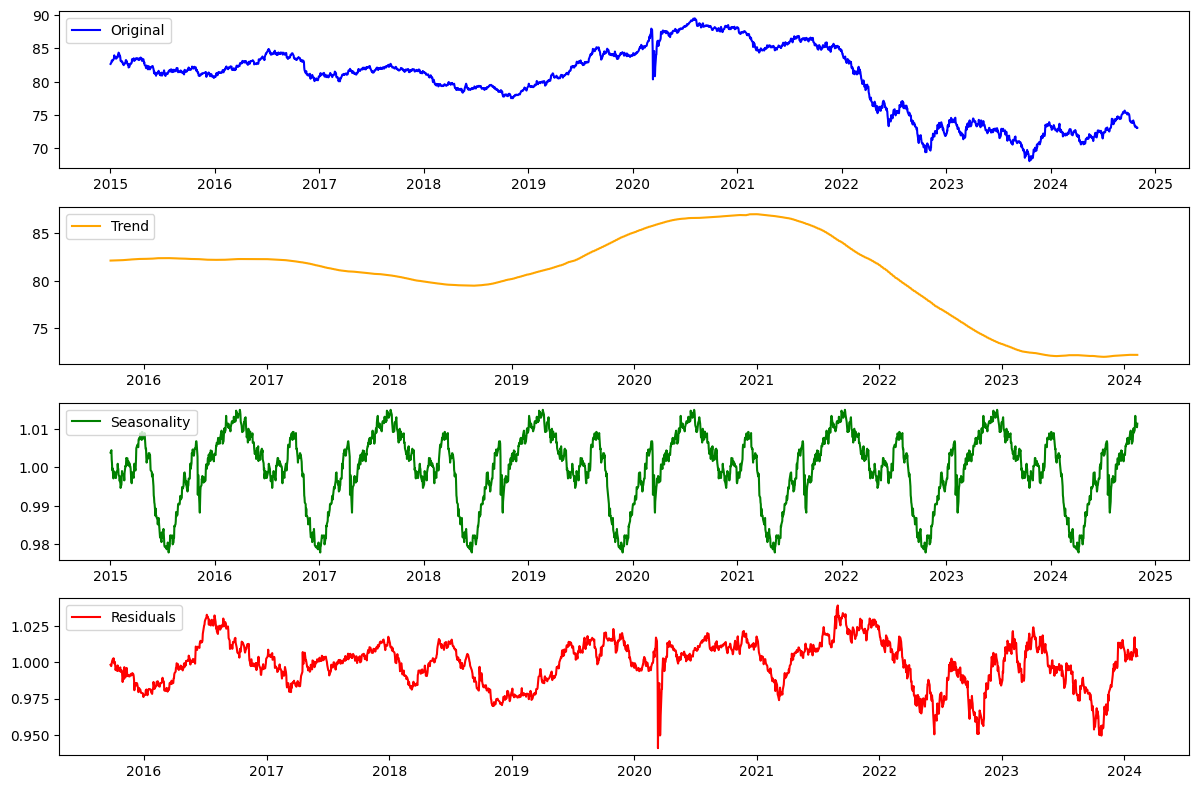

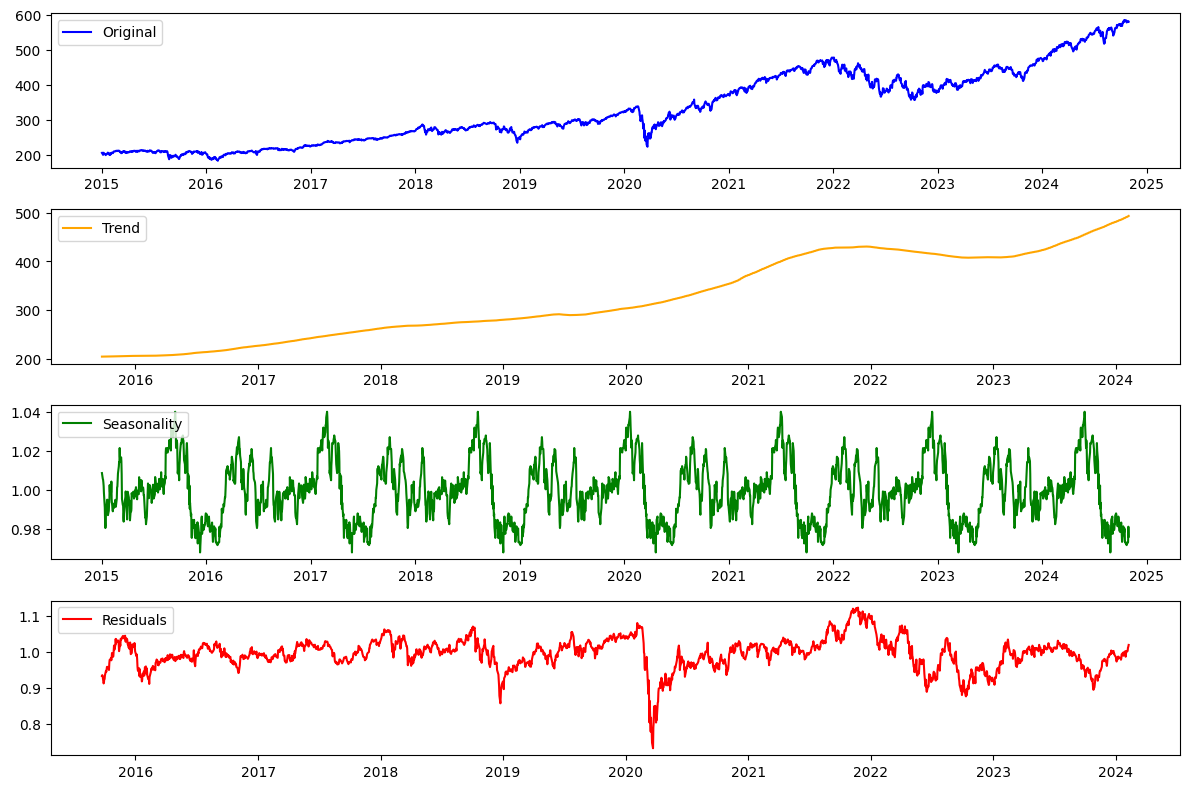

In [71]:
for ticker in tickers:
    df = data[ticker]
    decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(df['Close'], label='Original', color='blue')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='orange')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality', color='green')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='red')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()


**Analyze Days with Unusually High or Low Returns**

In [72]:
for ticker in tickers:
    df = data[ticker]
    daily_pct_change = df['Close'].pct_change()
    high_returns = daily_pct_change[daily_pct_change > 0.05]
    low_returns = daily_pct_change[daily_pct_change < -0.05]
    print(f"Days with high returns for {ticker}:")
    print(high_returns, "\n")
    print(f"Days with low returns for {ticker}:")
    print(low_returns, "\n")


Days with high returns for TSLA:
Ticker                        TSLA
Date                              
2015-01-02 00:00:00+00:00      NaN
2015-01-05 00:00:00+00:00      NaN
2015-01-06 00:00:00+00:00      NaN
2015-01-07 00:00:00+00:00      NaN
2015-01-08 00:00:00+00:00      NaN
...                            ...
2024-10-24 00:00:00+00:00  0.21919
2024-10-25 00:00:00+00:00      NaN
2024-10-28 00:00:00+00:00      NaN
2024-10-29 00:00:00+00:00      NaN
2024-10-30 00:00:00+00:00      NaN

[2474 rows x 1 columns] 

Days with low returns for TSLA:
Ticker                     TSLA
Date                           
2015-01-02 00:00:00+00:00   NaN
2015-01-05 00:00:00+00:00   NaN
2015-01-06 00:00:00+00:00   NaN
2015-01-07 00:00:00+00:00   NaN
2015-01-08 00:00:00+00:00   NaN
...                         ...
2024-10-24 00:00:00+00:00   NaN
2024-10-25 00:00:00+00:00   NaN
2024-10-28 00:00:00+00:00   NaN
2024-10-29 00:00:00+00:00   NaN
2024-10-30 00:00:00+00:00   NaN

[2474 rows x 1 columns] 

Days with 

**Define a Function to Evaluate and Refine the ARIMA Model**

In [73]:
def evaluate_arima_model(data, order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

In [74]:
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

In [75]:
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [76]:
for ticker in tickers:
    print(f"Data for {ticker}:")
    print(data[ticker].head(), "\n")

Data for TSLA:
Price                      Adj Close      Close       High        Low  \
Ticker                          TSLA       TSLA       TSLA       TSLA   
Date                                                                    
2015-01-02 00:00:00+00:00  14.620667  14.620667  14.883333  14.217333   
2015-01-05 00:00:00+00:00  14.006000  14.006000  14.433333  13.810667   
2015-01-06 00:00:00+00:00  14.085333  14.085333  14.280000  13.614000   
2015-01-07 00:00:00+00:00  14.063333  14.063333  14.318667  13.985333   
2015-01-08 00:00:00+00:00  14.041333  14.041333  14.253333  14.000667   

Price                           Open    Volume  
Ticker                          TSLA      TSLA  
Date                                            
2015-01-02 00:00:00+00:00  14.858000  71466000  
2015-01-05 00:00:00+00:00  14.303333  80527500  
2015-01-06 00:00:00+00:00  14.004000  93928500  
2015-01-07 00:00:00+00:00  14.223333  44526000  
2015-01-08 00:00:00+00:00  14.187333  51637500   

Data f

**Define a Function to Evaluate and Refine the ARIMA Model**

In [77]:
def evaluate_arima_model(data, order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

In [78]:
def plot_forecast(data, forecast, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Actual')
    plt.plot(forecast, label='Forecast', color='red')
    plt.title(title)
    plt.legend()
    plt.show()

c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an int

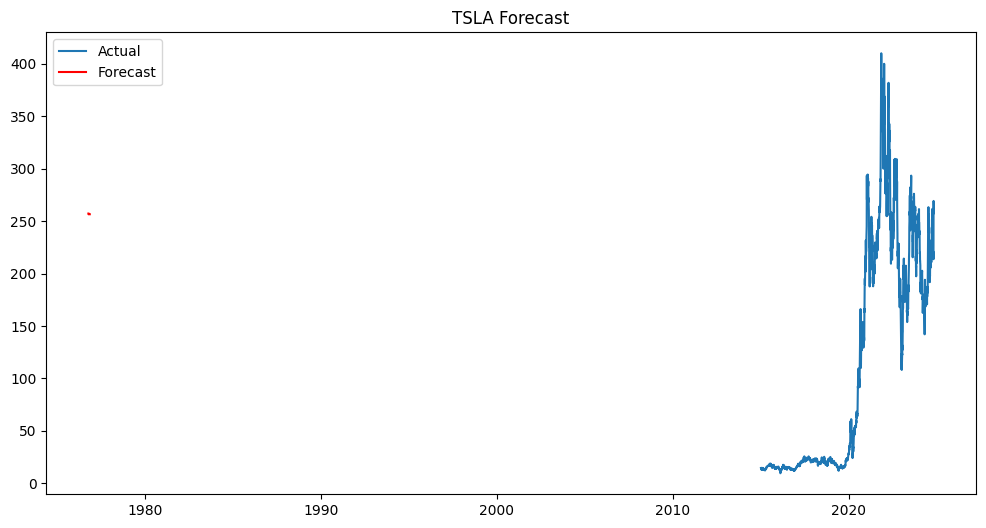

c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an int

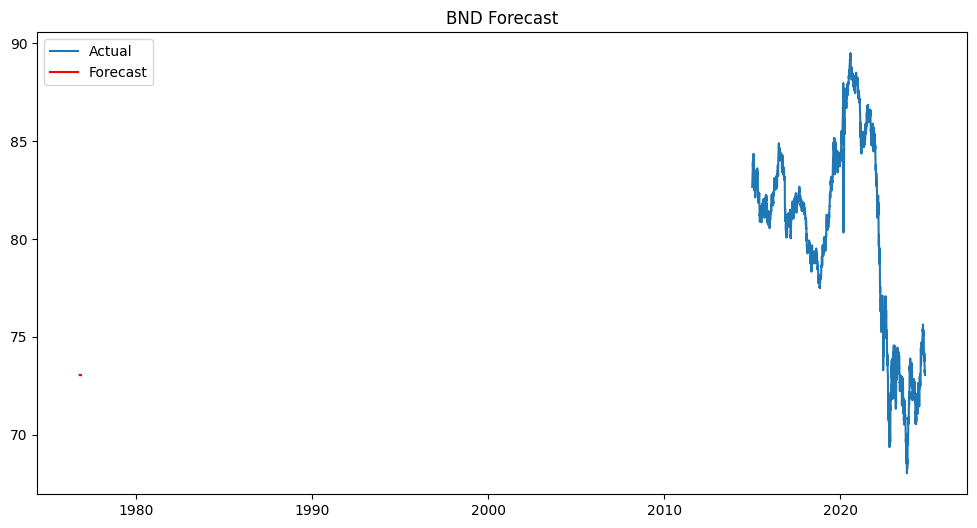

c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an int

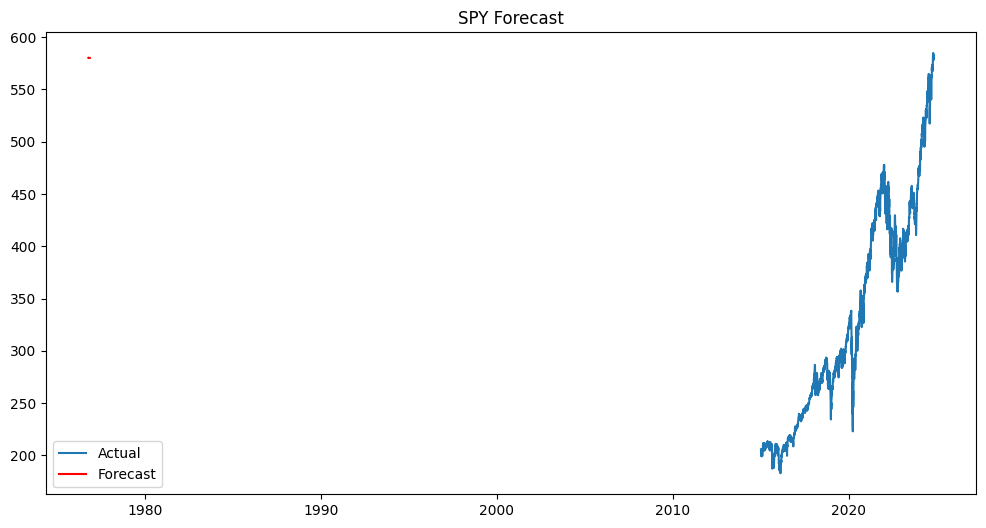

In [79]:
for ticker in tickers:
    ticker_data = data[ticker]['Close']
    model_fit = evaluate_arima_model(ticker_data, (5, 1, 0))
    forecast = model_fit.forecast(steps=30)
    plot_forecast(ticker_data, forecast, f'{ticker} Forecast')

**Define a function for SARIMA**

In [80]:
def evaluate_sarima_model(data, order, seasonal_order):
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    return model_fit


**Define a Function to Plot the Forecast**

In [81]:
def plot_forecast(data, forecast, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Actual')
    plt.plot(forecast, label='Forecast', color='red')
    plt.title(title)
    plt.legend()
    plt.show()


**Evaluate and Refine the SARIMA Model for Each Ticker**

c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without

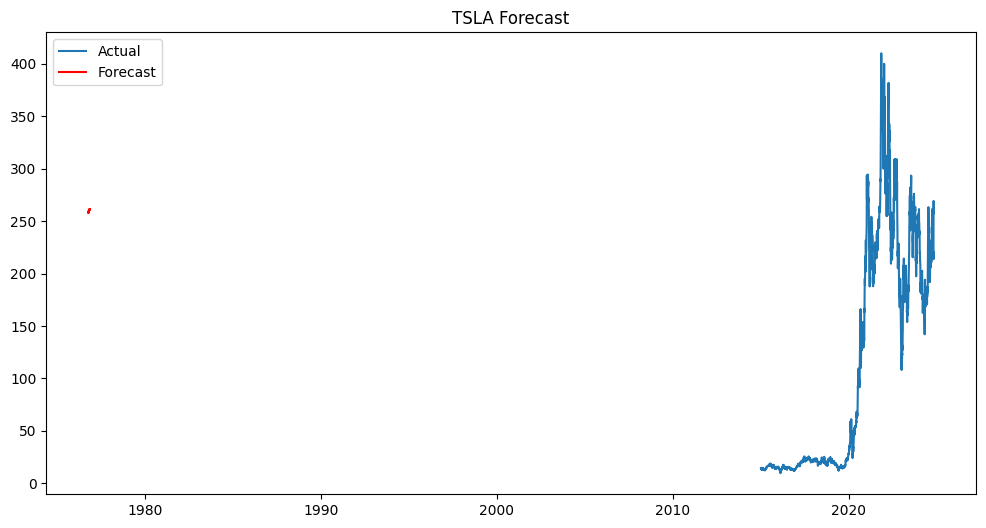

c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without

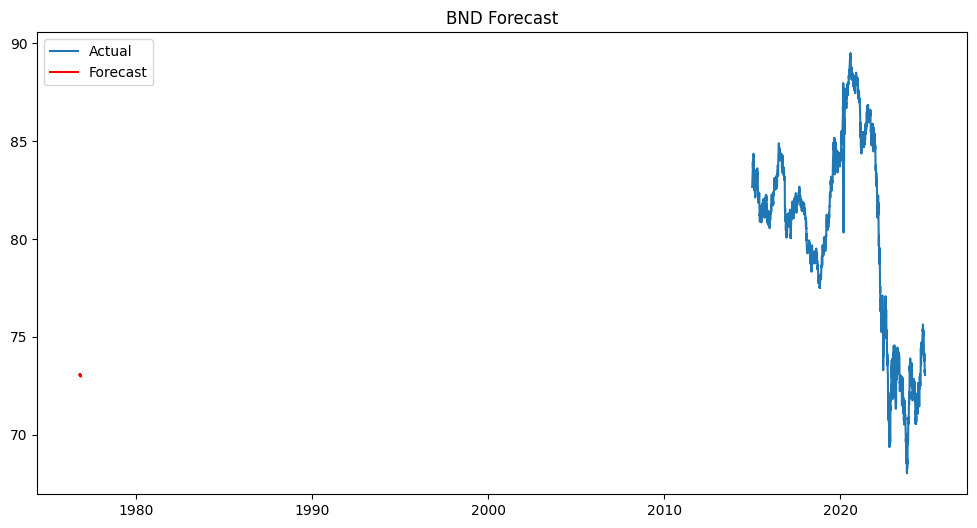

c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin.DESKTOP-M4R2VLU\11week\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without

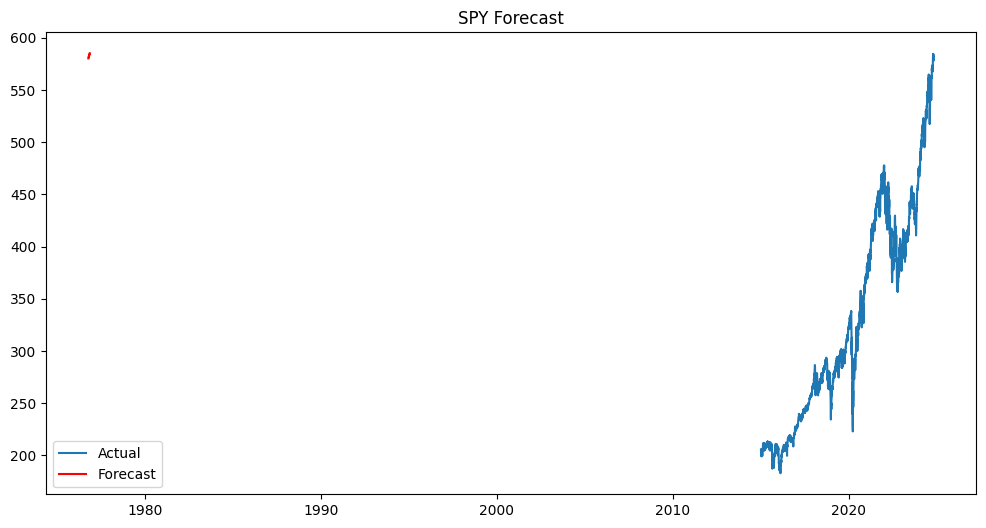

In [82]:
for ticker in tickers:
    ticker_data = data[ticker]['Close']
    model_fit = evaluate_sarima_model(ticker_data, (1, 1, 1), (1, 1, 1, 12))
    forecast = model_fit.get_forecast(steps=30).predicted_mean
    plot_forecast(ticker_data, forecast, f'{ticker} Forecast')


In [83]:
data

{'TSLA': Price                       Adj Close       Close        High         Low  \
 Ticker                           TSLA        TSLA        TSLA        TSLA   
 Date                                                                        
 2015-01-02 00:00:00+00:00   14.620667   14.620667   14.883333   14.217333   
 2015-01-05 00:00:00+00:00   14.006000   14.006000   14.433333   13.810667   
 2015-01-06 00:00:00+00:00   14.085333   14.085333   14.280000   13.614000   
 2015-01-07 00:00:00+00:00   14.063333   14.063333   14.318667   13.985333   
 2015-01-08 00:00:00+00:00   14.041333   14.041333   14.253333   14.000667   
 ...                               ...         ...         ...         ...   
 2024-10-24 00:00:00+00:00  260.480011  260.480011  262.119995  242.649994   
 2024-10-25 00:00:00+00:00  269.190002  269.190002  269.489990  255.320007   
 2024-10-28 00:00:00+00:00  262.510010  262.510010  273.540009  262.239990   
 2024-10-29 00:00:00+00:00  259.519989  259.519989  264.

**Evaluate and refine SARIMA model**

[*********************100%***********************]  1 of 1 completed


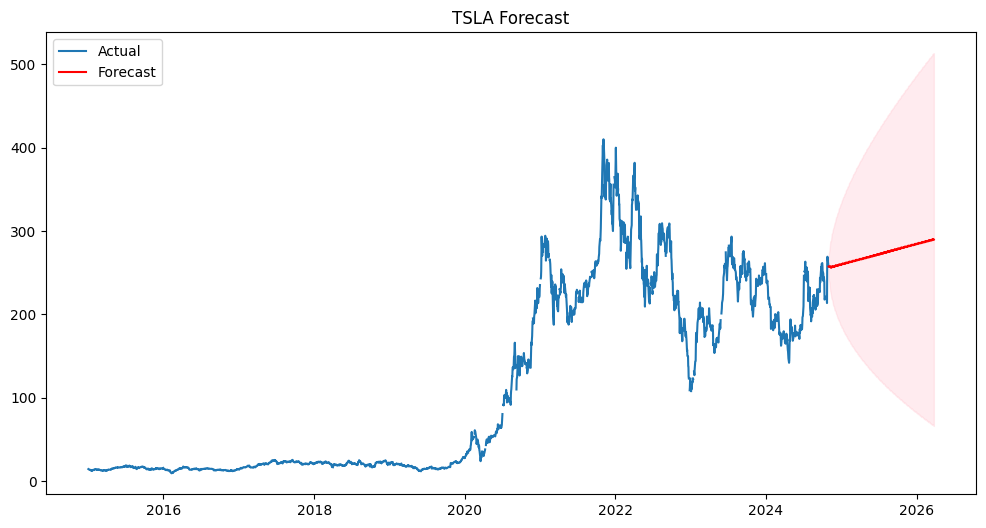

Forecast Analysis and Insights:
Trend Analysis:
The forecast shows the expected trend of Tesla's stock prices over the next 12 months.
Look for long-term trends (upward, downward, or stable) and identify any patterns or anomalies in the forecast.

Volatility and Risk:
The confidence intervals show the range within which the future prices are expected to lie.
Discuss the level of uncertainty captured by the confidence intervals.
Highlight any periods where volatility is expected to increase.

Market Opportunities and Risks:
Based on the forecast, outline potential market opportunities (e.g., expected price increases) and risks (e.g., high volatility or expected declines).


In [84]:
# Define the ticker and the date range
ticker = 'TSLA'
start_date = '2015-01-01'
end_date = '2024-10-31'

# Fetch the data for Tesla (TSLA)
tsla_data = yf.download(ticker, start=start_date, end=end_date)

# Ensure the date index has a frequency and matches the length of the data
tsla_data = tsla_data.asfreq('B')

# Function to evaluate and refine SARIMA model
def evaluate_sarima_model(data, order, seasonal_order):
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    return model_fit

# Function to plot the forecast with confidence intervals
def plot_forecast(data, forecast, conf_int, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Actual')
    plt.plot(forecast, label='Forecast', color='red')
    plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.title(title)
    plt.legend()
    plt.show()

# Evaluate and refine SARIMA model for TSLA
tsla_close_data = tsla_data['Close']
tsla_model_fit = evaluate_sarima_model(tsla_close_data, (1, 1, 1), (1, 1, 1, 12))

# Generate forecast for the next 12 months (365 days)
forecast_steps = 365
tsla_forecast = tsla_model_fit.get_forecast(steps=forecast_steps)
tsla_forecast_mean = tsla_forecast.predicted_mean
tsla_forecast_conf_int = tsla_forecast.conf_int()

# Plot the forecast alongside historical data
plot_forecast(tsla_close_data, tsla_forecast_mean, tsla_forecast_conf_int, 'TSLA Forecast')

# Forecast Analysis and Insights
print("Forecast Analysis and Insights:")
print("Trend Analysis:")
print("The forecast shows the expected trend of Tesla's stock prices over the next 12 months.")
print("Look for long-term trends (upward, downward, or stable) and identify any patterns or anomalies in the forecast.")

print("\nVolatility and Risk:")
print("The confidence intervals show the range within which the future prices are expected to lie.")
print("Discuss the level of uncertainty captured by the confidence intervals.")
print("Highlight any periods where volatility is expected to increase.")

print("\nMarket Opportunities and Risks:")
print("Based on the forecast, outline potential market opportunities (e.g., expected price increases) and risks (e.g., high volatility or expected declines).")